<a href="https://colab.research.google.com/github/keshavmot/Case-Study-Notebooks/blob/main/Netflix_CaseStudy_KeshavMot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Keshav Mot* | Business Case: Netflix - Data Exploration and Visualisation


#Problem Statement
To analyze the data and extract valuable insights to assist a popular online streaming platform in making informed decisions on content production and business expansion. Specific areas of interest included understanding the content landscape in different countries, tracking the evolution of movie releases over the past few decades, comparing TV shows and movies, determining optimal launch times, and examining the influence of actors and directors on the success of shows and movies.

# Raw Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O netflix.csv

In [ ]:
data = pd.read_csv('netflix.csv')
data2 = data.copy(deep=True)
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
data.shape

(8807, 12)

Shape of data of raw data: 8807 rows & 12 columns

In [ ]:
#Information of each column in the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


only 'release_year' column is in 'int64' format , all other are in 'object' data type.



---
# Basic Analysis & Pre-processing


1. Column Unnesting
 * By looking at the data columns like **'director'**, **'cast'**, **'country'** have multiple names. (separated by commas)

 *  For better analysis of the data it is better to seprate these values by creating multiple rows in the dataframe.














In [ ]:
#converting multiple names to a list seprated by comma.

data['director'] = data['director'].str.split(', ')
data['cast'] = data['cast'].str.split(', ')
data['country'] = data['country'].str.split(', ')


In [ ]:
#creating seprate rows

data = data.explode('director', True)
data = data.explode('cast', True)
data = data.explode('country', True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89382 entries, 0 to 89381
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       89382 non-null  object
 1   type          89382 non-null  object
 2   title         89382 non-null  object
 3   director      67445 non-null  object
 4   cast          88192 non-null  object
 5   country       83961 non-null  object
 6   date_added    89313 non-null  object
 7   release_year  89382 non-null  int64 
 8   rating        89344 non-null  object
 9   duration      89379 non-null  object
 10  listed_in     89382 non-null  object
 11  description   89382 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.2+ MB


2. Managing Null values
 * Looking at the information of the dataframe, we have multiple following columns with **null** values present. (out of 89382 entries)
    *  director - - - (21937)
    *  country - - - -  (5421)
    *  cast - - - - - - - (1190)
    *  date_added - - - (69)
    *  rating - - - - - - - - (38)
    *  duration - - - - - - - (4)
  
  
   *  Replacing null values of
    * director with unknown_director.
    * country with unknown_country.
    * cast with unknown_cast.

In [ ]:
data['director'] = data['director'].fillna('unknown_director')
data['country'] = data['country'].fillna('unknown_country')
data['cast'] = data['cast'].fillna('unknown_cast')

In [ ]:
#checking Non-Null Count for above columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89382 entries, 0 to 89381
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       89382 non-null  object
 1   type          89382 non-null  object
 2   title         89382 non-null  object
 3   director      89382 non-null  object
 4   cast          89382 non-null  object
 5   country       89382 non-null  object
 6   date_added    89313 non-null  object
 7   release_year  89382 non-null  int64 
 8   rating        89344 non-null  object
 9   duration      89379 non-null  object
 10  listed_in     89382 non-null  object
 11  description   89382 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.2+ MB


3. Managing date column ("date_added")
 * converting "date_added" object data type to datetime format

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [ ]:
data['date_added'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 89382 entries, 0 to 89381
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
89313 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 698.4 KB


In [ ]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Column is now converted to datetime format.


In [ ]:
data.shape

(89382, 12)

Shape of data of processed data: 89382 rows & 12 columns

---
# Non-graphical Analysis:

*NOTE: Question & analysis both are above the respective code*

In [ ]:
#creating a copy without unnested data.

data2['director'] = data2['director'].fillna('unknown_director')
data2['country'] = data2['country'].fillna('unknown_country')
data2['cast'] = data2['cast'].fillna('unknown_cast')
data2['date_added'] = pd.to_datetime(data2['date_added'], errors='coerce')

In [ ]:
#creating dataframe of unnested data for each single column for further analysis.

df_director = data2.copy()
df_director['director'] = df_director['director'].str.split(', ')
df_director = df_director.explode('director', True)

df_country = data2.copy()
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country', True)

df_cast = data2.copy()
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast', True)

df_genre = data2.copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')
df_genre = df_genre.explode('listed_in', True)

In [ ]:
# Shape of each dataframe
print(df_director.shape)
print(df_country.shape)
print(df_cast.shape)
print(df_genre.shape)

(9612, 12)
(10845, 12)
(64951, 12)
(19323, 12)


Q: Count of Movies vs TV Show ?
* 69.6% of content is movies and rest 30.3% are TV Shows.


In [ ]:
data2['type'].value_counts() # Using "data2" copy of without unnesting of data.

Movie      6131
TV Show    2676
Name: type, dtype: int64

Q: Top 5 director with highest number of movies?
* Maximum are unknown but appart from that "Rajiv Chilaka" have highest directed shows/movies.

In [ ]:
df_director['director'].value_counts().iloc[:6]

unknown_director    2634
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
Marcus Raboy          16
Name: director, dtype: int64

Q: Top 5 cast members with highest number of shows/movies?

* Top 5 cast members that appered the most are Anupam Kher,
Shah Rukh Khan,
Julie Tejwani,
Naseeruddin Shah,
Takahiro Sakurai

In [ ]:
df_cast['cast'].value_counts().iloc[:6]

unknown_cast        825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Name: cast, dtype: int64

Q: Top 5 country productions?

* United States have produced high number of content, followed by India.
* Other top countries are UK, Canada and France

In [ ]:
df_country['country'].value_counts().iloc[:6]

United States      3689
India              1046
unknown_country     831
United Kingdom      804
Canada              445
France              393
Name: country, dtype: int64

Q: Most common rating in content?

* TV-MA is most common rating where "MA" stands for "Mature Audience Only" (for 17+ audience)
* Maximum content of netflix is target towards Adult audiences.

In [ ]:
data2['rating'].value_counts().iloc[:3]

TV-MA    3207
TV-14    2160
TV-PG     863
Name: rating, dtype: int64

Q: Genre with hightest movie count?

* International Movies & Dramas both have significant numbers of movie count.
* Followed by Comedies cateogry on netflix.

In [ ]:
df_genre['listed_in'].value_counts().iloc[:6]

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Action & Adventure         859
Name: listed_in, dtype: int64

---
# Graphical analysis 1
Basic graphical analysis for different categories.

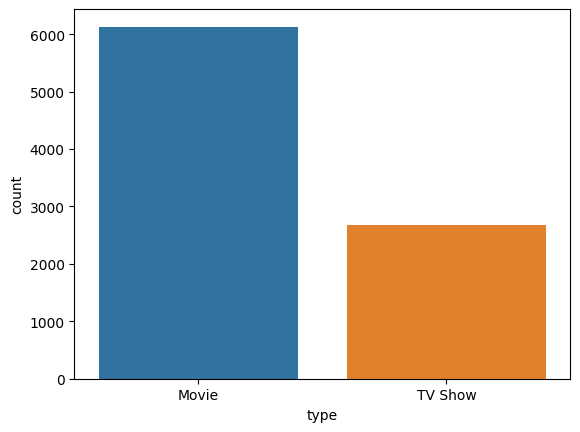

In [ ]:
sns.countplot(data=data2, x='type')
plt.show()

**Amount of shows produced:**
* Movies produced are almost double of total TV Shows created.

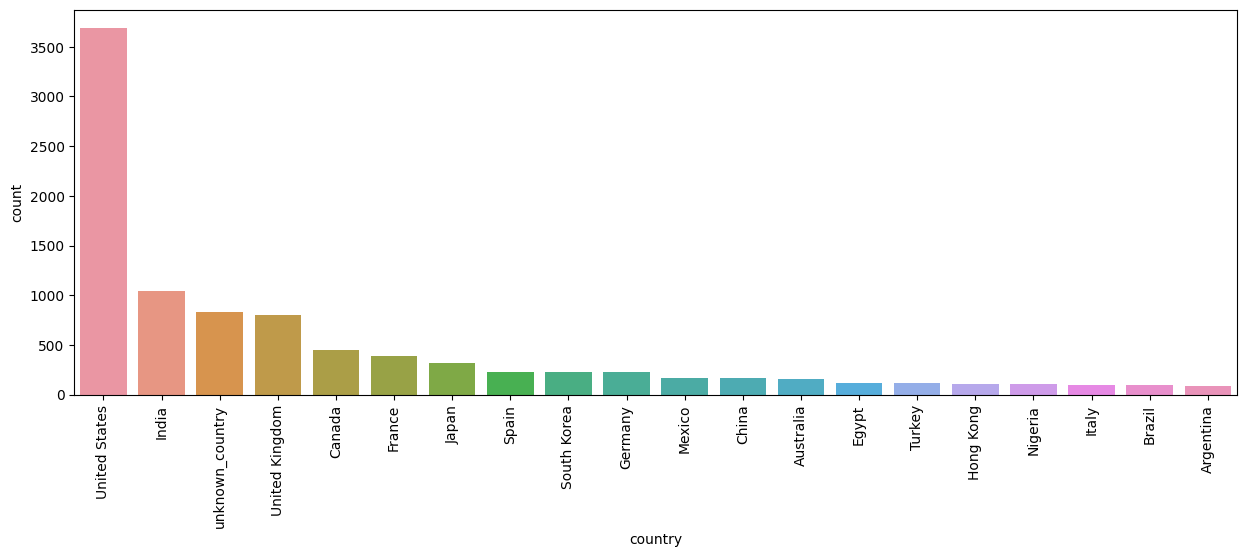

In [ ]:
plt.subplots(figsize=(15,5))
sns.countplot(data=df_country, x='country', order= df_country['country'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

**Country with high prdocution:**
* USA is leading with a very high margin in the movie production. Followed by countries like India, UK, Canada ....

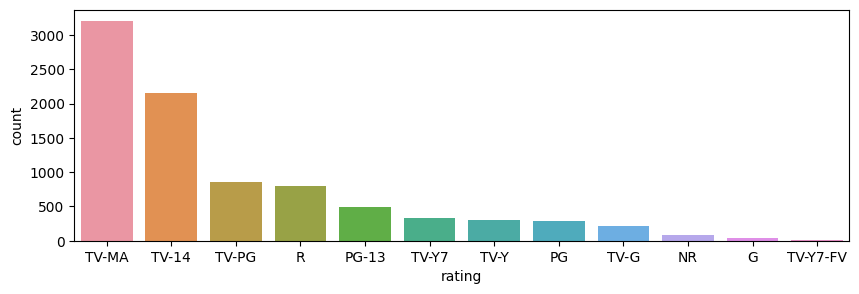

In [ ]:
plt.subplots(figsize=(10,3))
sns.countplot(data=data2, x='rating', order= data2['rating'].value_counts().iloc[:12].index)
plt.show()

**Rating of content:**
* Major content produced is for Mature Audience Only (17+)
* After that shows target audiance of 14+ Ages or need parent guidance to watch.

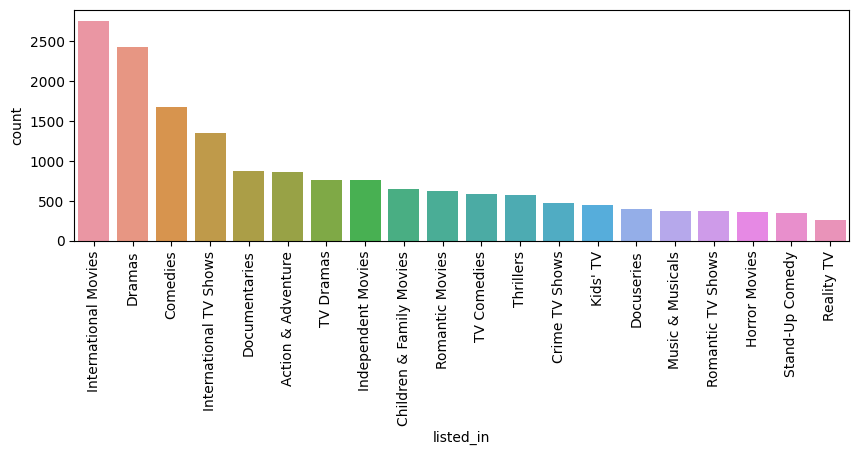

In [ ]:
plt.subplots(figsize=(10,3))
sns.countplot(data=df_genre, x='listed_in', order= df_genre['listed_in'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

**Popular Movie Genre:**
* International Movies is hightest movie genre & Dramas genre also have significant numbers of movie count.
* Followed by Comedies movie count.

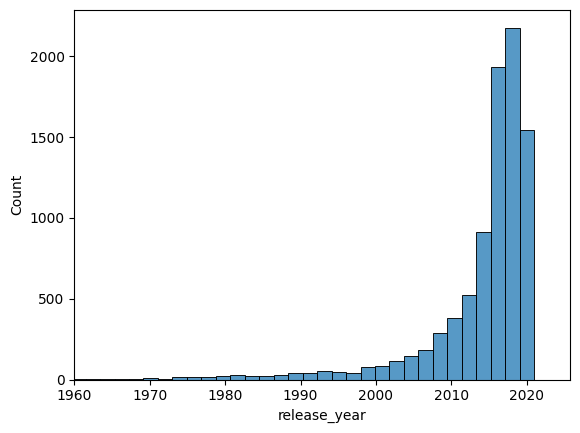

In [ ]:
sns.histplot(x = data2['release_year'],bins=50)
plt.xlim(1960,)
plt.show()

**Movie released per year:**
* Data represents the number of movies released each year on netflix. Their is a sharp rise in production of movies and maximum movies are produced between 2010 to 2020.

---
# Graphical analysis 2

### Q: Comparison between tv shows vs movies?
Comparing top countries in terms of tv shows vs movies produced.



 1. Movies produced in each country

In [ ]:
# Filtering out only movies

mask_movie = data['type']=='Movie'
df_m = data[mask_movie].groupby('country')['title'].agg(['nunique'])
df_m = df_m.sort_values(by='nunique',ascending=False).reset_index()
df_m.head(11)

,country,nunique
0,United States,2751
1,India,962
2,United Kingdom,532
3,unknown_country,440
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114


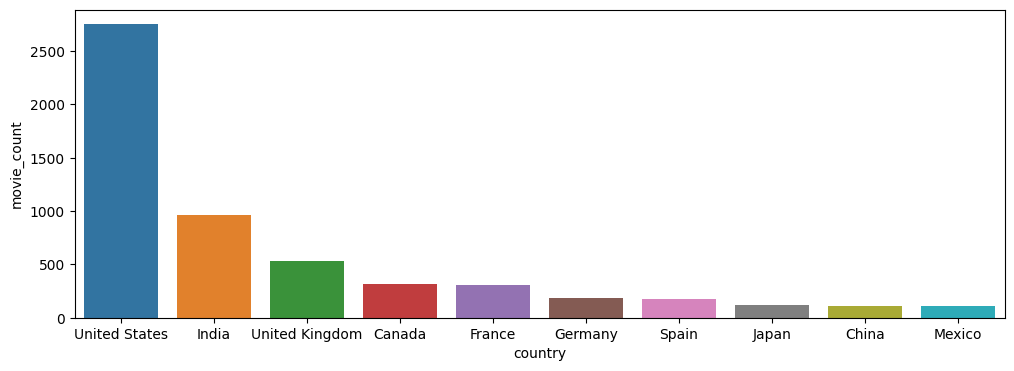

In [ ]:
# Top 10 countries with highest movie count

plt.subplots(figsize=(12,4))
sns.barplot(data=df_m[df_m['country']!='unknown_country'].iloc[:10], x='country', y='nunique')
plt.ylabel('movie_count')
plt.show()

2. TV shows produced in each country

In [ ]:
# Filtering out only TV Show

mask_tv = data['type']=='TV Show'
df_tv = data[mask_tv].groupby('country')['title'].agg(['nunique'])
df_tv = df_tv.sort_values(by='nunique',ascending=False).reset_index()
df_tv.head(11)

,country,nunique
0,United States,938
1,unknown_country,391
2,United Kingdom,272
3,Japan,199
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66


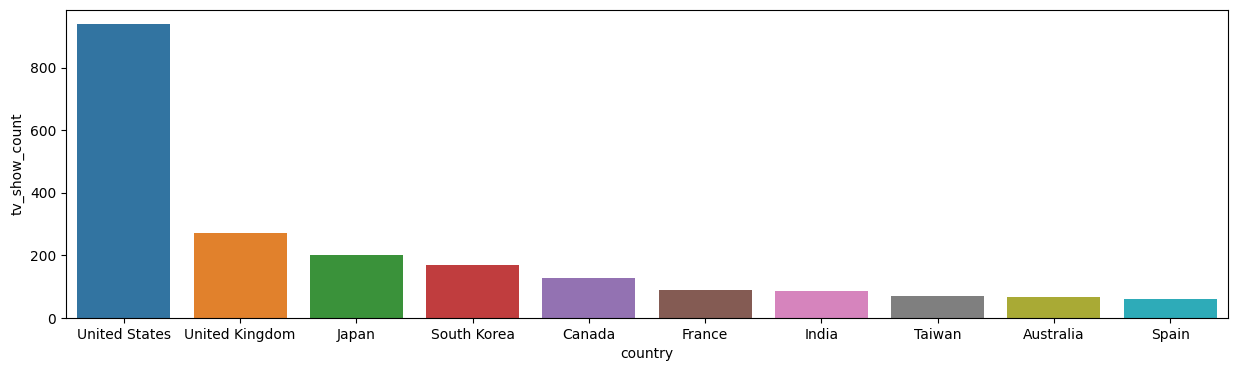

In [ ]:
# Top 10 countries with highest movie count

plt.subplots(figsize=(15,4))
sns.barplot(data=df_tv[df_tv['country']!='unknown_country'].iloc[:10], x='country', y='nunique')
plt.ylabel('tv_show_count')
plt.show()

* United States is the top country to produce both Movies & TV Shows.
* India is second in terms of Movies.
* UK is second in terms of TV Shows.


* Countries in top 10 that produce TV shows only:
  * South Korea
  * Taiwan
  * Austrlia
* Countries in top 10 that produce Movies only:
  * Germany
  * Mexico
  * China

---
# Graphical analysis 3

### Q: Best time to launch a movie or Tv show?
Best week and month to launch a content.

In [ ]:
#adding column for week and month

data['month'] = data['date_added'].dt.month
data['week_num'] = data['date_added'].dt.isocalendar().week


In [ ]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,week_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,38
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38
2,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38


Best week to lauch:

In [ ]:
df_w_mov = data[mask_movie].groupby('week_num')['title'].agg(['nunique']).reset_index()
df_w_tv = data[mask_tv].groupby('week_num')['title'].agg(['nunique']).reset_index()

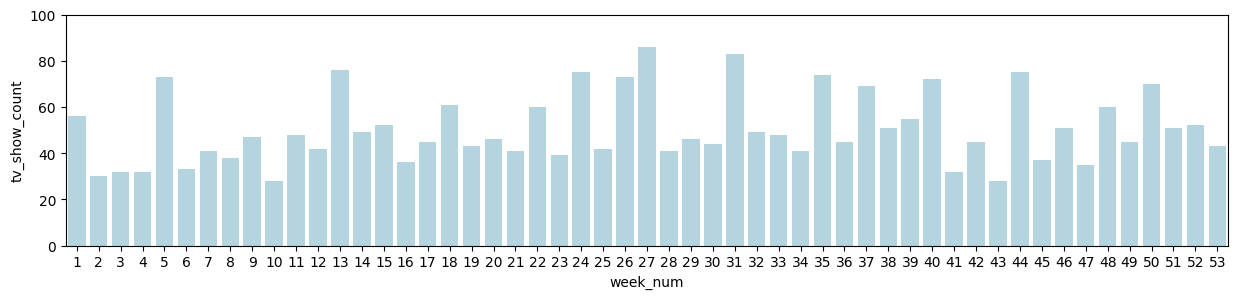

In [ ]:
plt.subplots(figsize=(15,3))
sns.barplot(data=df_w_tv, x='week_num', y='nunique', label='TV shows', color='lightblue')
plt.ylabel('tv_show_count')
plt.ylim(0,100)
plt.show()

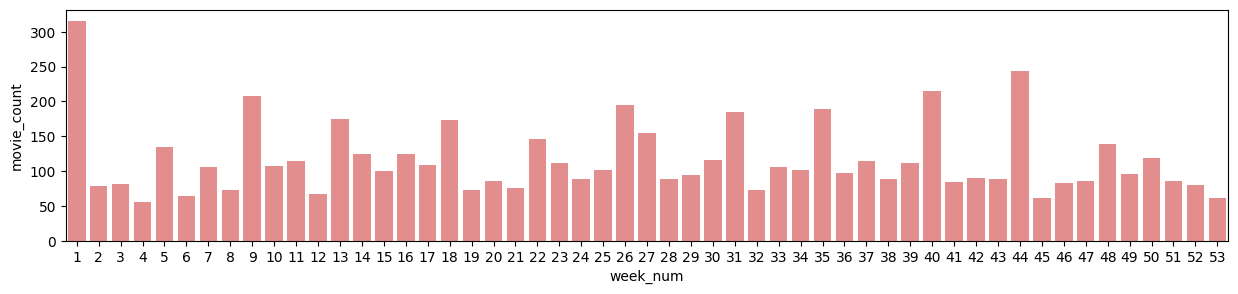

In [ ]:
plt.subplots(figsize=(15,3))
sns.barplot(data=df_w_mov, x='week_num', y='nunique', label='Movies', color='lightcoral')
plt.ylabel('movie_count')
plt.show()

* Number of movies lauched is far greater than TV series launched in whole year
>* Movies:
>  *  First week of the year usually have hightest number of release.
>  *  Occasional spikes at week 9, 26, 40, 44 are present.
>* TV shows:
>  *  Middle week, that is 27 weekof the year have hightest number of release.
>  *  Occasional spikes at week 5, 13, 31, 35, 44 are present.
>* Common Weeks:
>  *  Week 13, 26, 40 ,44 are some weeks where both TV & Movies have significant combined spikes

 * Starting week of each year is best time of Movie launch.
 * Middle week of each year is best time of TV series launch.



Best month to lauch:

In [ ]:
df_m_mov = data[mask_movie].groupby('month')['title'].agg(['nunique']).reset_index()
df_m_tv = data[mask_tv].groupby('month')['title'].agg(['nunique']).reset_index()
df_m_mov['month'] = df_m_mov['month'].astype(int)
df_m_tv['month'] = df_m_tv['month'].astype(int)

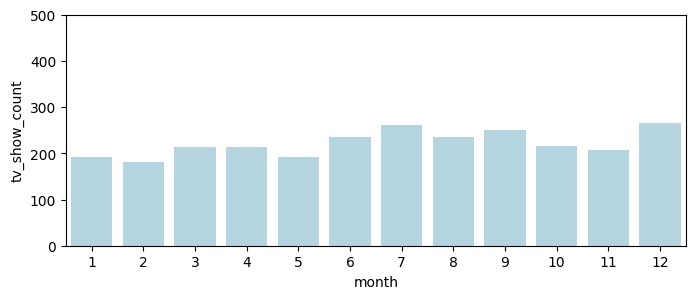

In [ ]:
plt.subplots(figsize=(8,3))
sns.barplot(data=df_m_tv, x='month', y='nunique', label='TV shows', color='lightblue')
plt.ylabel('tv_show_count')
plt.ylim(0,500)
plt.show()

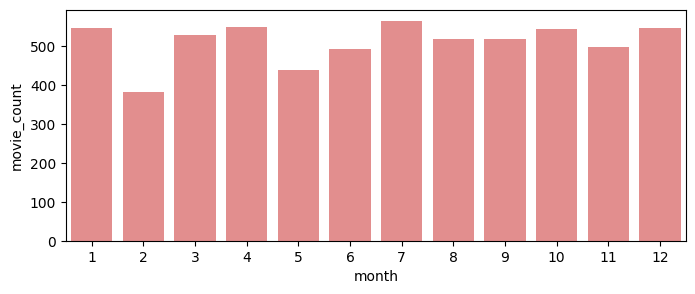

In [ ]:
plt.subplots(figsize=(8,3))
sns.barplot(data=df_m_mov, x='month', y='nunique', label='Movies', color='lightcoral')
plt.ylabel('movie_count')
plt.show()

* Similarly Number of movies lauched is almost double than TV series launched each month.
>* Movies:
>  *  Movies have similar lauch rate all over the year.
>  *  Month like Feb & May have low number of launches.
>* TV shows:
>  *  Month of Dec have hightest number of release, followed by July.
>* Common Weeks:
>  *  July have significant combined count for both types.

 * Good popularity all months for a Movie launch.
 * Holiday season (Dec) is the best time for TV series launch.



---
# Graphical analysis 4

### Q: actors/directors appeared the most?
1. Top 10 Directors.

In [ ]:
mask_null = data['director']!='unknown_director'

#Names of top 10 director
top_dir = data[mask_null].groupby('director')['title'].agg(['nunique']).sort_values(by=('nunique'),ascending=False).iloc[:10].index
top_dir = pd.DataFrame(top_dir)

#Collectong count of top 10 dir.
df_dir = data.groupby('director')['title'].agg(['nunique'])
df_dir = df_dir.reset_index()

df_dir_tv = data[mask_tv].groupby('director')['title'].agg(['nunique'])
df_dir_tv = df_dir_tv.reset_index()

#merging total vs tv_series shows produced
top_dir = top_dir.merge(df_dir, on='director', how='left')
top_dir = top_dir.merge(df_dir_tv, on='director', how='left')

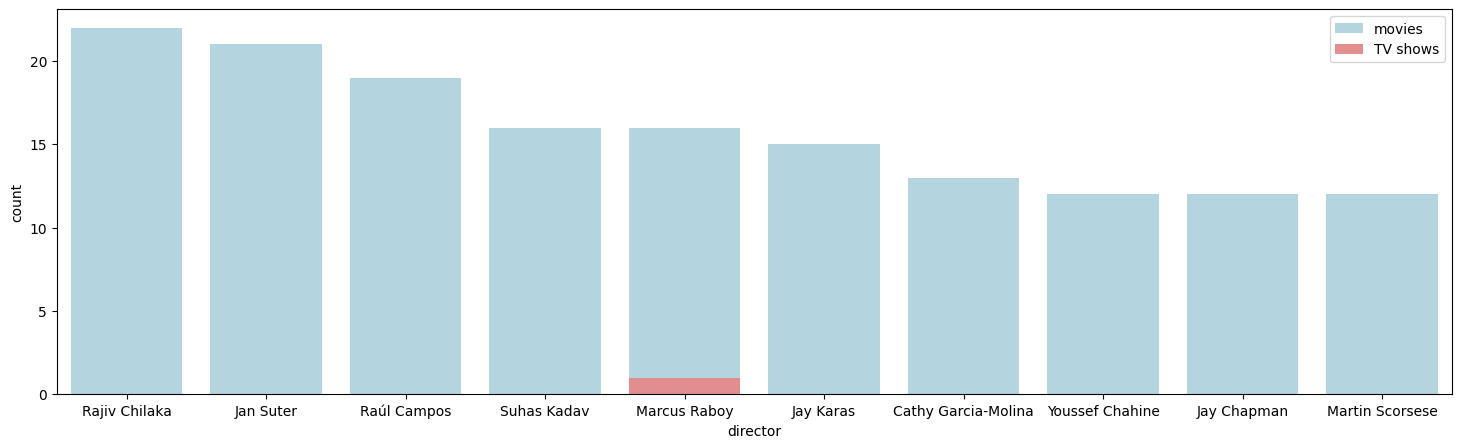

In [ ]:
plt.subplots(figsize=(18,5))
sns.barplot(data=top_dir, x='director', y='nunique_x', label='movies', color='lightblue')
sns.barplot(data=top_dir, x='director', y='nunique_y', label='TV shows', color='lightcoral')
plt.ylabel('count')
plt.legend()
plt.show()

Top 10 directors are shown in the above graph.
This graph also contain information of number of movies vs tv_series created.
* Directors that are in the top 10 have mostly produced Movies only in thier career.
>* Rajiv Chilaka have hightest number of content created.
>  * This director has only produced Movies, Zero TV shows.
>* Marcus Raboy on the 5th position is the only one with experience of a TV series.
>  * This director has produced atlest one TV shows unlike above director.



2. Top 10 Cast members.

In [ ]:
mask_null = data['cast']!='unknown_cast'

#Names of top 10 cast
top_cast = data[mask_null].groupby('cast')['title'].agg(['nunique']).sort_values(by=('nunique'),ascending=False).iloc[:10].index
top_cast = pd.DataFrame(top_cast)

#Collectong count of top 10 cast.
df_cast = data.groupby('cast')['title'].agg(['nunique'])
df_cast = df_cast.reset_index()

df_cast_tv = data[mask_tv].groupby('cast')['title'].agg(['nunique'])
df_cast_tv = df_cast_tv.reset_index()

#merging total vs tv_series shows produced
top_cast = top_cast.merge(df_cast, on='cast', how='left')
top_cast = top_cast.merge(df_cast_tv, on='cast', how='left')

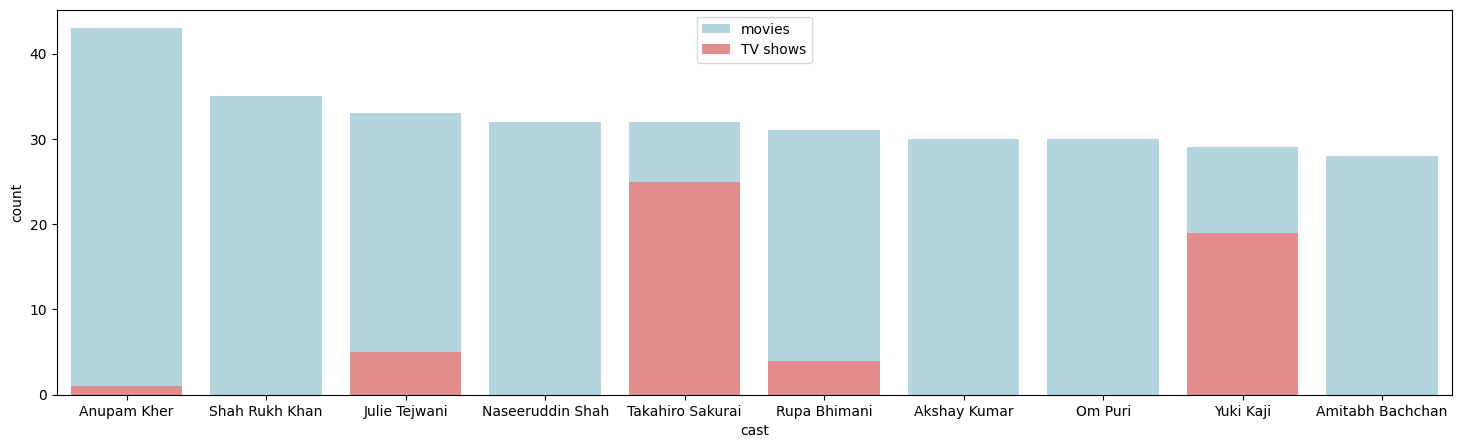

In [ ]:
plt.subplots(figsize=(18,5))
sns.barplot(data=top_cast, x='cast', y='nunique_x', label='movies', color='lightblue')
sns.barplot(data=top_cast, x='cast', y='nunique_y', label='TV shows', color='lightcoral')
plt.ylabel('count')
plt.legend()
plt.show()

Top 10 cast members are shown in the above graph.
This graph also contain information of number of movies vs tv_series cast worked on.
* Cast in top 10 have mostly appeared in Movies, but their is significant increase in TV series as compared to directors.

>* Anupam Kher have hightest number of appearance
>  * This actor has worked on atlest one TV shows and rest are movies.
>* Takahiro Sakurai on the 5th position is the only one with greater experience of a TV series.
>  * This actor unlike other cast in the graph have highest experience in TV series acting.

* Total 5 actors have appeared in TV shows out of 10.
* Total 10 out of 10 actors have appeared in some movie.

---
# Graphical analysis 5

### Q: Popular movie genre?


In [ ]:
from wordcloud import WordCloud

In [ ]:
#Unnesting genre data.
df_genre = data2.copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')
df_genre = df_genre.explode('listed_in', True)

In [ ]:
#concating all strings in column
text = ' '.join(df_genre['listed_in'])

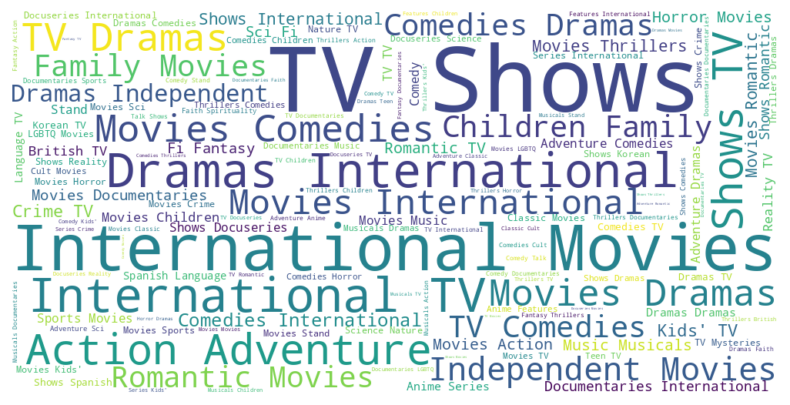

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

To Visualize the strings that are present in the genre column we have used a wordcloud. It is a graphical reprentation where bigger word shows higher frequency of that word.
* Popular genres:
 *  "TV Shows" is the biggest term that catches the eye while looking at the word cloud. "TV Shows" is one of the top genre that is tagged with the movies.
 *  Other popular genres are "Internation Movies", "Dramas", "Action", "Adventure", "Internation TV" so on ...
  *  Other smaller words represent the genre that are less popular for production of movies and TV series.

**Popular movie description?**

In [ ]:
#concating all strings in column description
text2 = ' '.join(data2['description'])

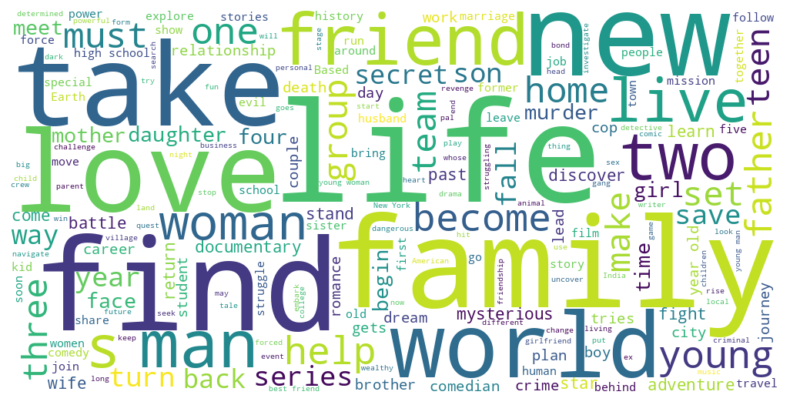

In [ ]:
wordcloud2 = WordCloud(width = 1000, height = 500, background_color="white").generate(text2)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

To Visualize the description of the movies above wordcloud is created.
* Popular description/word used:
 *  "Family" & "life" is the biggest word that catches the eye while looking at the word cloud. "Family" & "life" is a relateable word to a large number of audience.
 *  Other popular word like "friend", "love", "find", "love", "take" are also highlighted in the multiple movies.

  *  Other smaller words represent the genre that are less popular for production of movies and TV series.

---
# Graphical analysis 6

### Q: Time between Movie production and availability in netflix ?

In [ ]:
data3=data2.copy()

In [ ]:
data3[['date_added','release_year']].head(3)

,date_added,release_year
0,2021-09-25,2020
1,2021-09-24,2021
2,2021-09-24,2021


*ASSUMPTION:* Release date to each movie is "1st January XXXX" of that respective year.
* As we are trying to find out difference in days between movie produced and movie added on netflix.

In [ ]:
#converting year int to date time format.
data3['release_year'] = pd.to_datetime(data3['release_year'], format='%Y')

In [ ]:
data3[['date_added','release_year']].head(3)

,date_added,release_year
0,2021-09-25,2020-01-01
1,2021-09-24,2021-01-01
2,2021-09-24,2021-01-01


In [ ]:
data3[['date_added','release_year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_added    8797 non-null   datetime64[ns]
 1   release_year  8807 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 137.7 KB


20 values in "date_added" are null.

In [ ]:
#droping Null values
data3 = data3.dropna(subset=['date_added'])

In [ ]:
#Adding a new column in dataframe with days difference.
data3['day_diff'] = (data3['date_added'] - data3['release_year']).dt.days

In [ ]:
data3[['date_added','release_year','day_diff']].head(3)

,date_added,release_year,day_diff
0,2021-09-25,2020-01-01,633
1,2021-09-24,2021-01-01,266
2,2021-09-24,2021-01-01,266


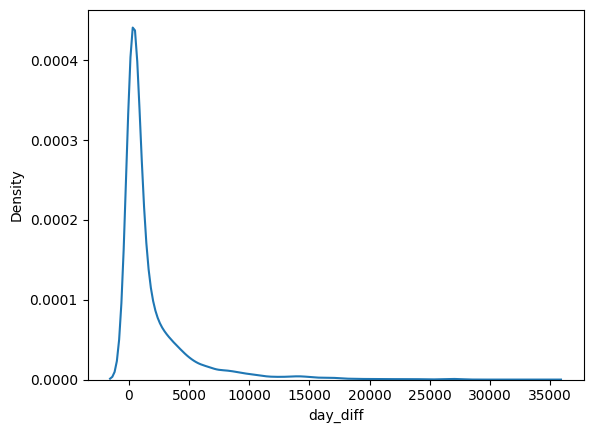

In [ ]:
sns.kdeplot(x=data3[data3['day_diff']>=0]['day_diff'])
plt.show()

Find out day difference with highest number of release.

In [ ]:
data3['day_diff'].mode()

0    334
Name: day_diff, dtype: int64

"334" Days is the mode difference between movie produced and movie added on netflix.
* Accoring to this, most of the movie are availabe in the platform within 1 year of its release.

> Best time to launch a TV show is within a year.

---
# Graphical analysis 7


Corelation in dataframe.

In [ ]:
data.corr()

<ipython-input-521-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,release_year,month,week_num
release_year,1.000000,-0.017192,-0.009277
month,-0.017192,1.000000,0.860104
week_num,-0.009277,0.860104,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


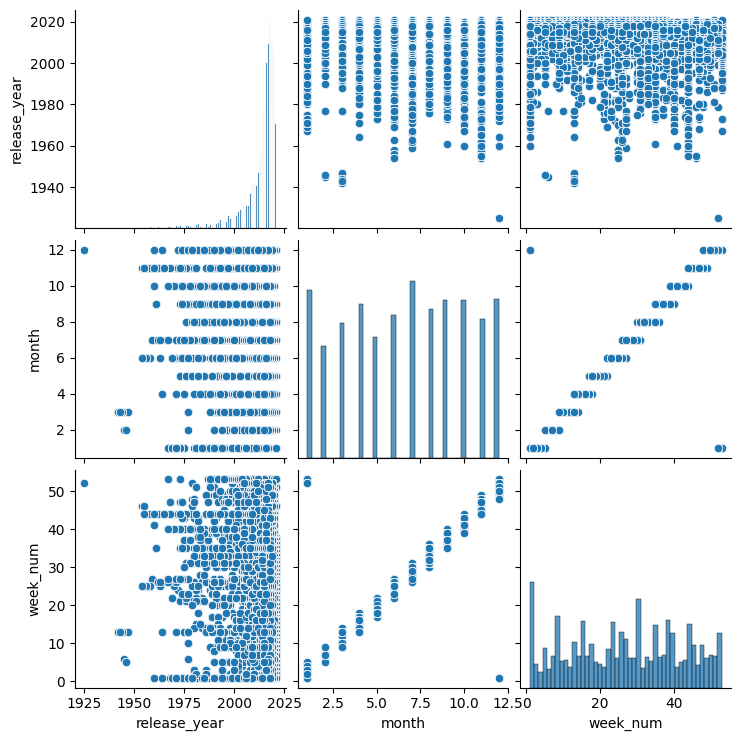

In [ ]:
sns.pairplot(data = data)
plt.show()

**Q: Changes in movie release the last 20-30 years?**

In [ ]:
#Grouping data by each year.
df_rel = data.groupby('release_year')['title'].agg(['nunique']).reset_index()

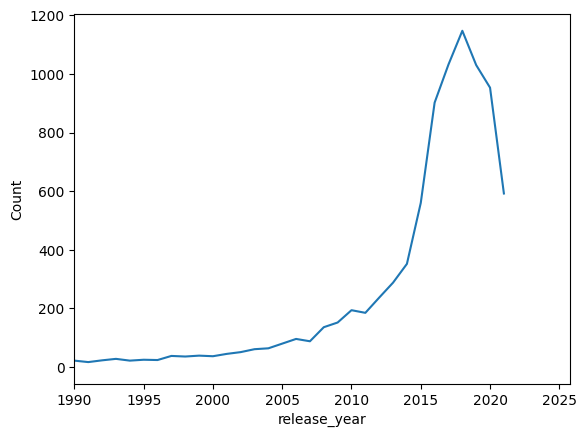

In [ ]:
sns.lineplot(data=df_rel,x='release_year', y='nunique')
plt.xlim(1990,)
plt.ylabel("Count")
plt.show()

Last 20 - 30 year have a drastic change in term of movie production. Their is a spike in production of movies and maximum movies are produced between last 10 years.x

**Q: content is available in different countries?**

In [ ]:
#Unnesting country & genre data.

df_country = data2.copy()
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country', True)
df_country = df_country[df_country['country']!='unknown_country']

In [ ]:
df_gen_con = df_country.copy()
df_gen_con['listed_in'] = df_gen_con['listed_in'].str.split(', ')
df_gen_con = df_gen_con.explode('listed_in', True)

In [ ]:
#Picking top 10 Genre and countary.

top_con = df_gen_con['country'].value_counts().index[:10]
top_gen = df_gen_con['listed_in'].value_counts().index[:10]

In [ ]:
t10_data = df_gen_con.loc[ (df_gen_con['country'].isin(top_con)) & (df_gen_con["listed_in"].isin(top_gen))]

In [ ]:
#grouping but top 10 country & genre
df_temp = t10_data.groupby(['country','listed_in'])['show_id'].count()
df_temp = pd.DataFrame(df_temp)
df_temp = df_temp.reset_index()

In [ ]:
#Pivoting and treating data for heatmap.
df_unmelted = df_temp.pivot(index='listed_in', columns='country').reset_index()

df_unmelted.columns = df_unmelted.columns.droplevel(0)
df_unmelted = df_unmelted.reset_index(drop=True)
df_unmelted = df_unmelted.rename(columns={'':'country'})
df_unmelted = df_unmelted.set_index(['country'])

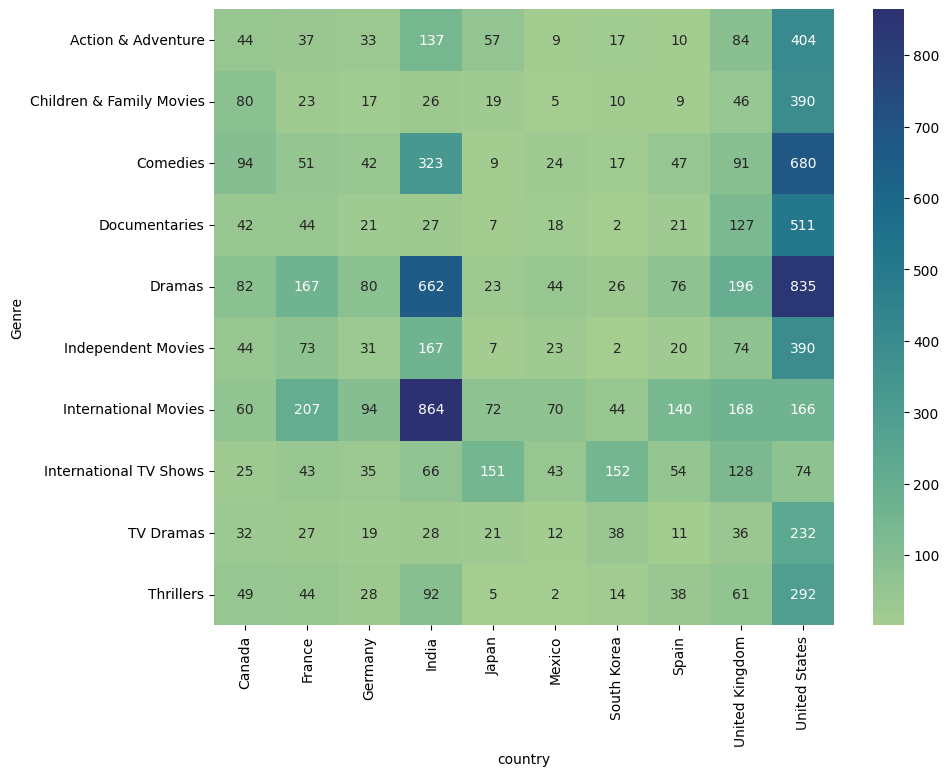

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(df_unmelted, annot = True, fmt=".0f", cmap="crest")
plt.ylabel('Genre')
plt.show()

Heat Map between Top 10 Countries and Genre produced.

* USA have produced highest number of movies.
 *  With highest count in Dramas and Comedy
 *  with lowest count in International TV shows.
* India is 2nd in terms of movie production.
 *  With highest count in Internationl Movies, followed by drama
 *  with lowest count in TV drama, documentries, and kids content.
* South Korea heavily focus on International TV Shows.
 *  Other area are low in count for South Korea
* Internationl Movies & drama are prime production for many countries like India, France, USA, UK.
* Documentries are mostly produced by USA unlike other countries.

